In [1]:
import pandas as pd

# read 5guys_flight_data_preprocessed.csv into a dataframe
df = pd.read_csv('data/5guys_flight_data_preprocessed.csv')

# Train

Best parameters: {'n_neighbors': 11}
Best score: 0.603520598905608


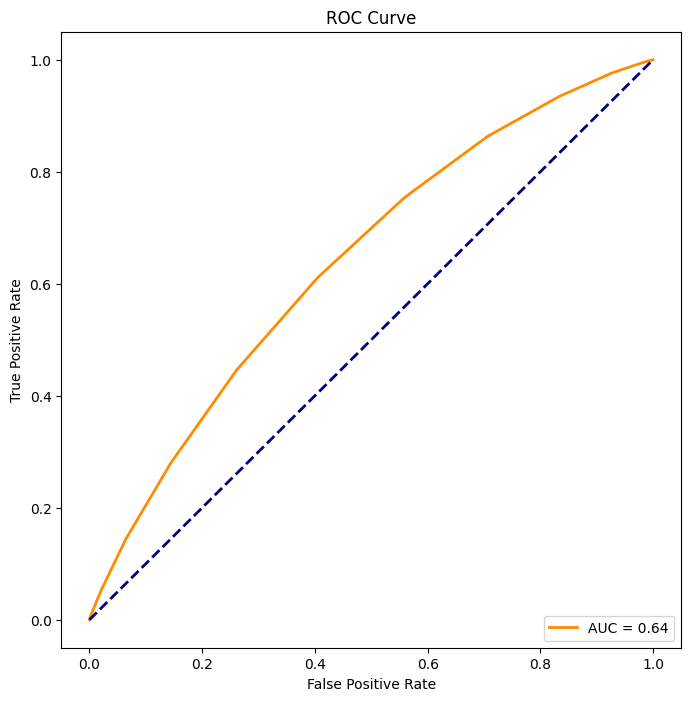

Accuracy: 0.5980737889822939
Confusion Matrix:
[[262083 178328]
 [ 39932  62692]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.87      0.60      0.71    440411
         1.0       0.26      0.61      0.36    102624

    accuracy                           0.60    543035
   macro avg       0.56      0.60      0.54    543035
weighted avg       0.75      0.60      0.64    543035



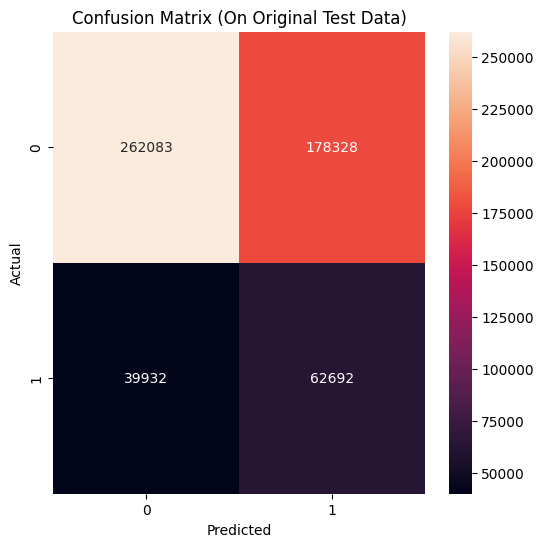

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from imblearn.under_sampling import RandomUnderSampler
import matplotlib.pyplot as plt
import seaborn as sns

# Select top 5 features from feature importance graph
features = df.columns.to_list()
features.remove('DEP_DEL15')

# target feature
target = 'DEP_DEL15'

# Split the dataset into training and testing sets
X = df[features]
y = df[target]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

# Perform undersampling on the training data only
undersampler = RandomUnderSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = undersampler.fit_resample(X_train, y_train)

# KNN model
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

# grid search to tune hyperparameters of the model
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': [1,3,5,7,9,11]}
grid = GridSearchCV(model, param_grid, cv=5, scoring='f1')
grid.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and the corresponding score
print(f'Best parameters: {grid.best_params_}')
print(f'Best score: {grid.best_score_}')

# set KNN parameters to the values returned by grid search
model = grid.best_estimator_

# Train classifier
model.fit(X_train_resampled, y_train_resampled)

# Predict on test data
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the ROC curve points
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# Display metrics
# Evaluate the model on the original test set
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)

# Confusion matrix
import seaborn as sns
plt.figure(figsize=(6, 6))
sns.heatmap(confusion, annot=True, cmap='rocket', fmt='g', cbar=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (On Original Test Data)')
plt.show()